In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv('tmp.txt',sep='\t',names=['millis','1','2','3'])

In [161]:
u = df['millis'].values

In [162]:
df.head()

,millis,1,2,3
0,49945,555.0,NaN,NaN
1,49946,555.0,NaN,NaN
2,49947,555.0,NaN,NaN
3,49948,555.0,NaN,NaN
4,49949,555.0,NaN,NaN


<IPython.core.display.Javascript object>


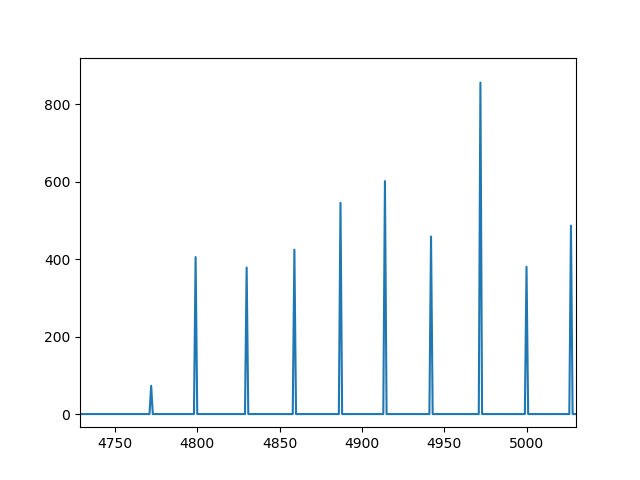

In [163]:
plt.figure()
plt.plot(np.diff(u))

In [10]:
%matplotlib notebook

In [11]:
from btClient import read_data

In [12]:
data = read_data("./tmp_data.pkl")
data = np.array(data)

In [15]:
data

array([[ 1.0020e+03, -1.4280e+01,  2.6245e+02,  3.7000e+00],
       [ 1.0170e+03, -9.0500e+00,  1.7253e+02,  3.7000e+00],
       [ 1.0320e+03, -5.6100e+00,  1.1283e+02,  3.7100e+00],
       ...,
       [ 3.4097e+04,  8.8000e-01,  1.9600e+00,  1.1740e+01],
       [ 3.4112e+04,  8.7000e-01,  1.9700e+00,  1.1740e+01],
       [ 3.4127e+04,  8.8000e-01,  1.9800e+00,  1.1750e+01]])

<IPython.core.display.Javascript object>


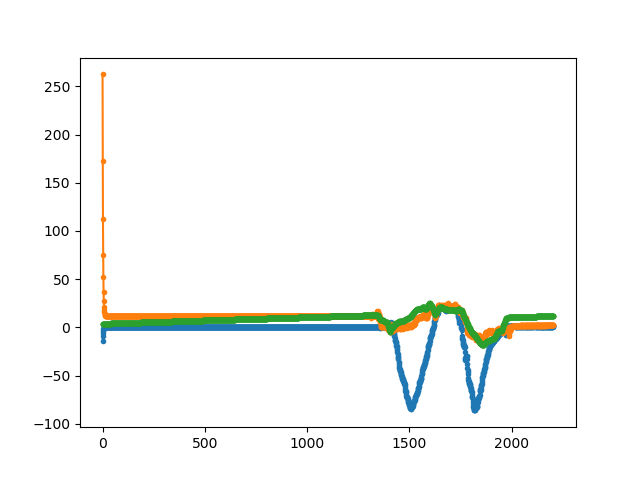

In [21]:
plt.figure()
#plt.plot(data[:,1],'.-')
plt.plot(data[:,1:],'.-')

In [22]:
data1 = read_data("./tmp_data_1.pkl")
data1 = np.array(data1)

In [23]:
data2 = read_data("./tmp_data_2.pkl")
data2 = np.array(data2)

<IPython.core.display.Javascript object>


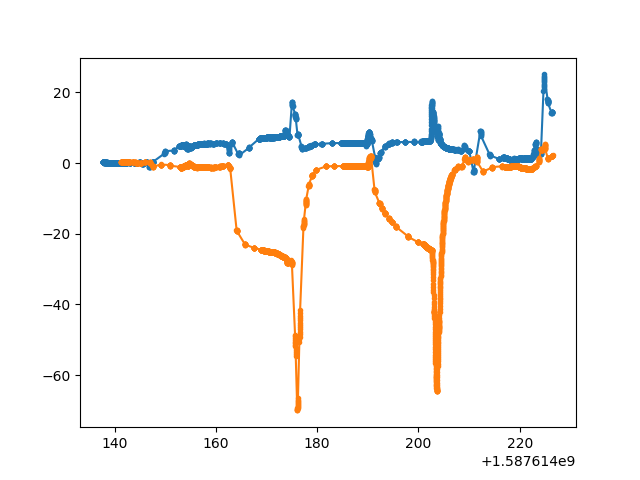

In [36]:
plt.figure()
plt.plot(data1[:,0]+data1[:,1]/1000,data1[:,-1],'.-')
plt.plot(data2[:,0]+data2[:,1]/1000,data2[:,-1],'.-')

In [37]:
times1 = data1[:,0]+data1[:,1]/1000
times2 = data2[:,0]+data2[:,1]/1000

In [50]:
times = np.hstack([times1,times2])

In [52]:
times.sort()

In [79]:
dates = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f') for x in times]

In [81]:
dates1 = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f') for x in times1]
dates2 = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f') for x in times2]

In [98]:
df = pd.DataFrame(index=dates)

In [100]:
df.loc[dates1,'data1']=data1[:,-1]
df.loc[dates2,'data2']=data2[:,-1]

In [106]:
df.interpolate(inplace=True)

In [109]:
df.dropna(inplace=True)

In [113]:
df['ankle'] = df['data1']-df['data2']

<IPython.core.display.Javascript object>


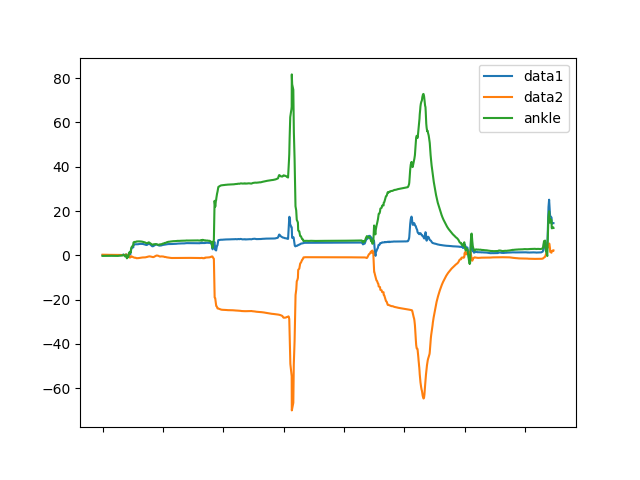

In [114]:
df.plot()